In [2]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [3]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [4]:
cmap_map = 'plasma'

## Data access

    
The file names are:
- quaia_G\<Glim\>\<tag\>.fits
- selection_function_NSIDE64_G\<Glim\>\<tag\>.fits

where \<Glim\> is either 20.0 or 20.5, and \<tag\> is an empty string for the full catalogs and for the redshift-split catalogs, "zsplit<N>bin<n>CIB" where N is 3 or 6 and n is the nth bin.
    
The bins are:
- zsplit3: z_edges = [0, 1.0, 2.3, 5]
- zsplit6: z_edges = [0,  0.5, 1.0, 1.5, 2.0, 2.5, 5]

In [5]:
z_bins_3 = [0, 1.0, 2.3, 5]
z_bins_6 = [0,  0.5, 1.0, 1.5, 2.0, 2.5, 5]

## Load data from local machine

In [6]:
fn_gcatlo = f'../data/quaia_G20.0.fits'
fn_gcathi = f'../data/quaia_G20.5.fits'

fn_sello = f"../data/maps/selection_function_NSIDE64_G20.0.fits"
fn_selhi = f"../data/maps/selection_function_NSIDE64_G20.5.fits"

fn_randlo = f'../data/randoms/random_G20.0_10x.fits'
fn_randhi = f'../data/randoms/random_G20.5_10x.fits'

In [7]:
fn_gcathi_zbin0 = f'../data/quaia_G20.5_zsplit2bin0.fits'
fn_gcathi_zbin1 = f'../data/quaia_G20.5_zsplit2bin1.fits'

fn_selhi_zbin0 = f"../data/maps/selection_function_NSIDE64_G20.5_zsplit2bin0.fits"
fn_selhi_zbin1 = f"../data/maps/selection_function_NSIDE64_G20.5_zsplit2bin1.fits"

fn_randhi_zbin0 = f'../data/randoms/random_G20.5_10x_zsplit2bin0.fits'
fn_randhi_zbin1 = f'../data/randoms/random_G20.5_10x_zsplit2bin1.fits'

## Parameters

In [8]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [9]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

In [10]:
G_hi = 20.5
G_lo = 20.0

## 3 bin case

0 24
0 46
0 21


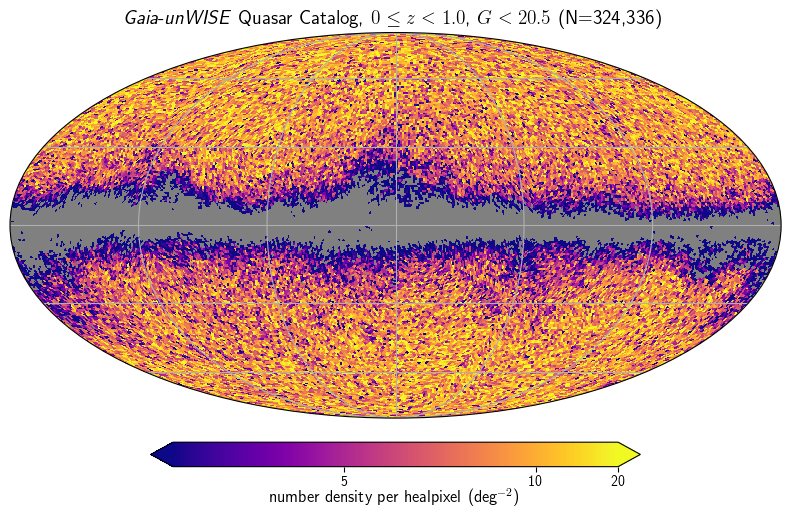

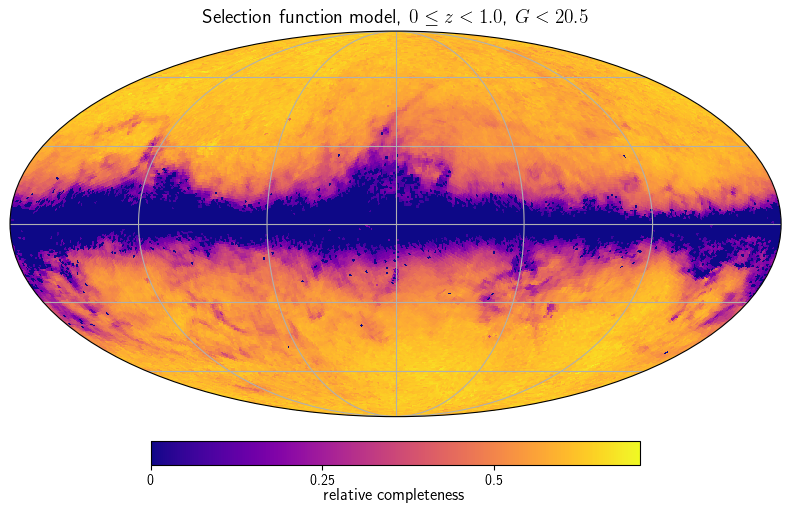

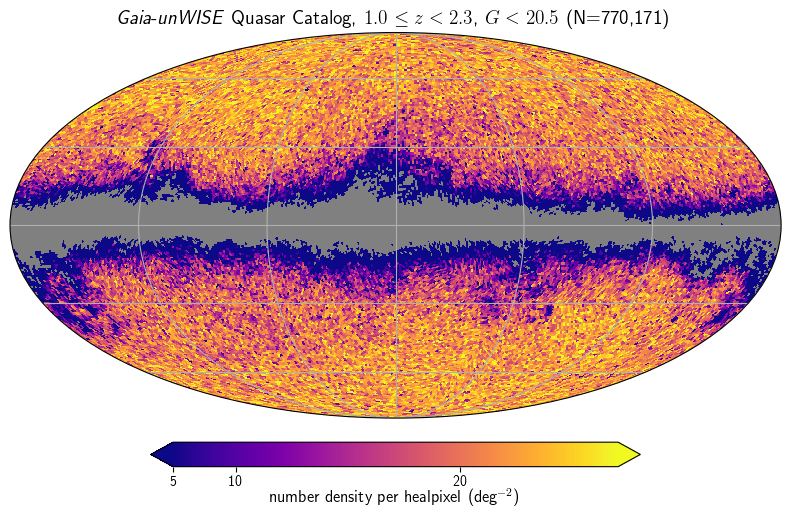

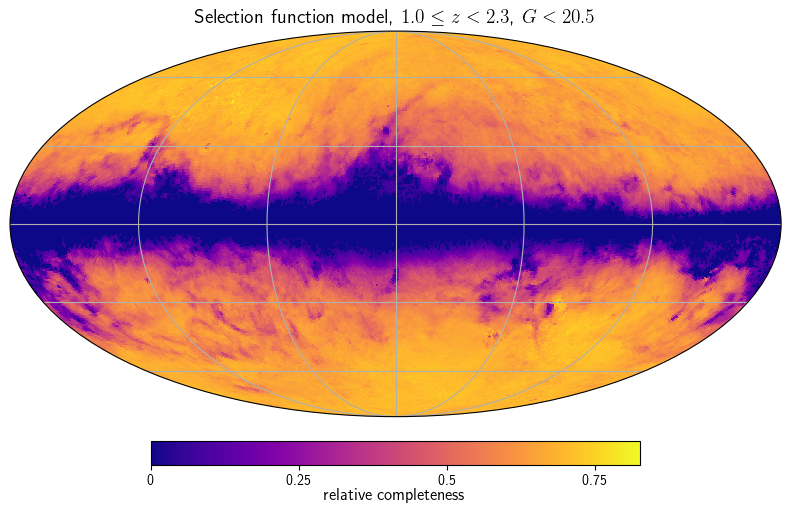

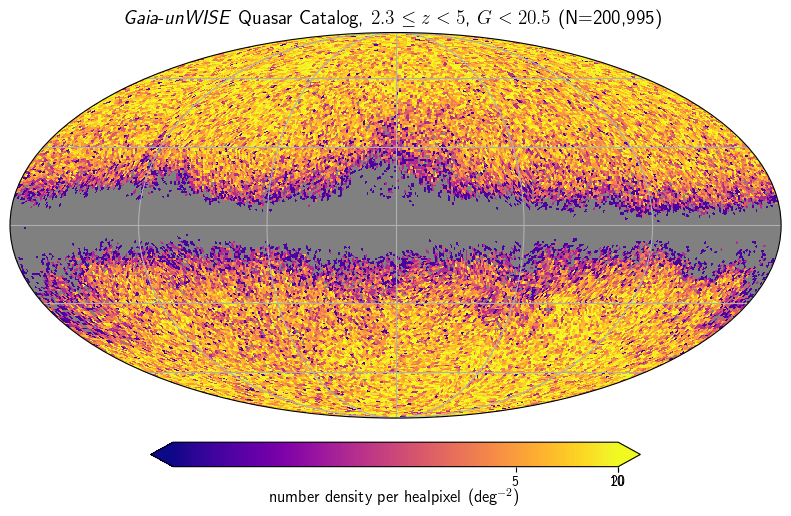

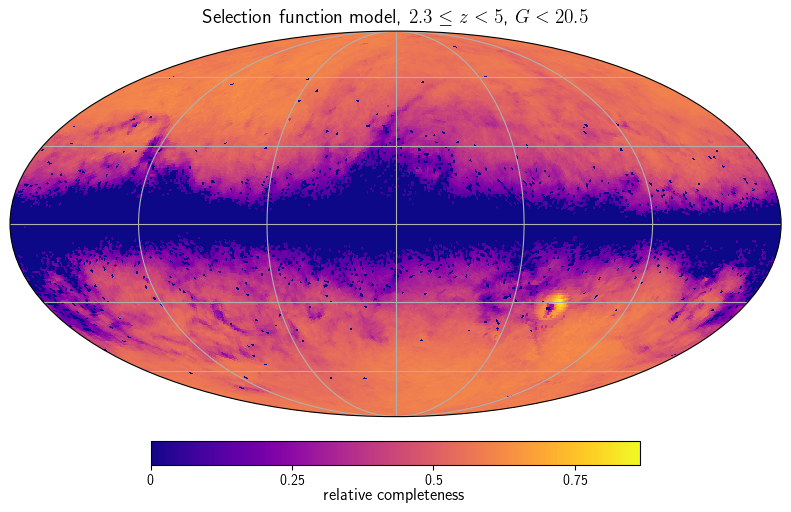

In [19]:
G_lim = G_hi
z_bins = z_bins_3
N = len(z_bins)-1

for n in range(N):
    tag_cat = f'_zsplit{N}bin{n}CIB'
    z_str = f'${z_bins[n]} \leq z < {z_bins[n+1]}$'
    fn_gcat = f'../data/quaia_G{G_lim}{tag_cat}.fits'

    tab_gcat = Table.read(fn_gcat)
    N_gcat = len(tab_gcat)
    #print(f"Number of data sources: {N_gcat}")
    
    # Make map
    pixel_indices_gcat = hp.ang2pix(NSIDE, tab_gcat['ra'], tab_gcat['dec'], lonlat=True)
    map_gcat = np.bincount(pixel_indices_gcat, minlength=NPIX)
    print(np.min(map_gcat), np.max(map_gcat))

    title_gcat = rf"{name_catalog}, {z_str}, $G<{G_lim}$ (N={len(tab_gcat):,})"
    projview(map_gcat, title=title_gcat,
                unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
                min=np.median(map_gcat)-np.std(map_gcat), max=np.median(map_gcat)+1.5*np.std(map_gcat), 
                norm='log', graticule=True,
                cbar_ticks=[5, 10, 20]) 
    
    # Selection function
    fn_sel = f"../data/maps/selection_function_NSIDE64_G{G_lim}{tag_cat}.fits"
    map_sel = hp.read_map(fn_sel)
    
    projview(map_sel, title=rf"Selection function model, {z_str}, $G<{G_lim}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_sel),
            cbar_ticks=np.arange(0, max(map_sel), 0.25)
            ) 

## 6-bin case

0
1
2
3
4
5


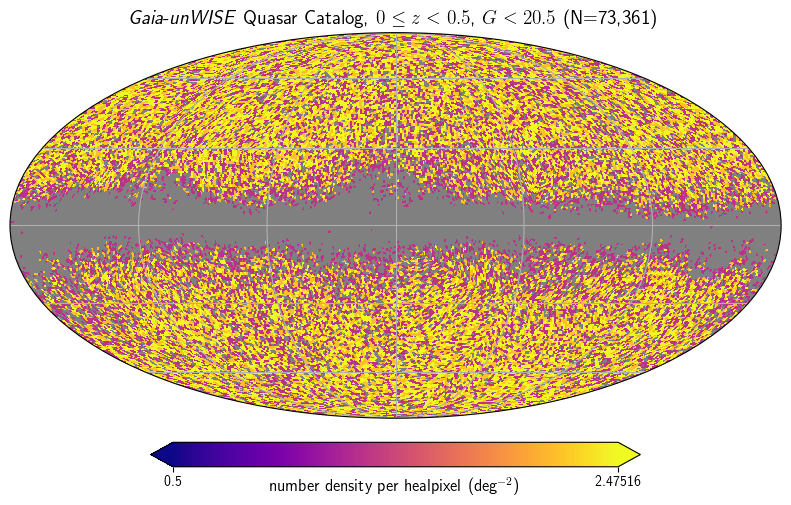

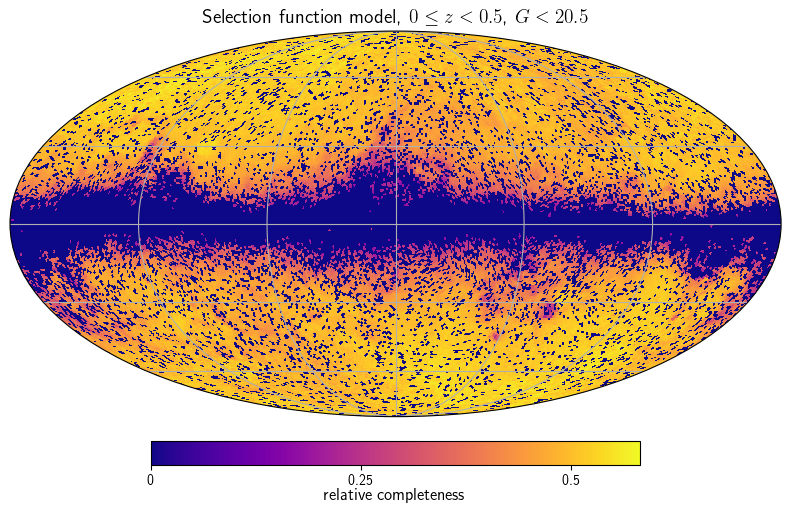

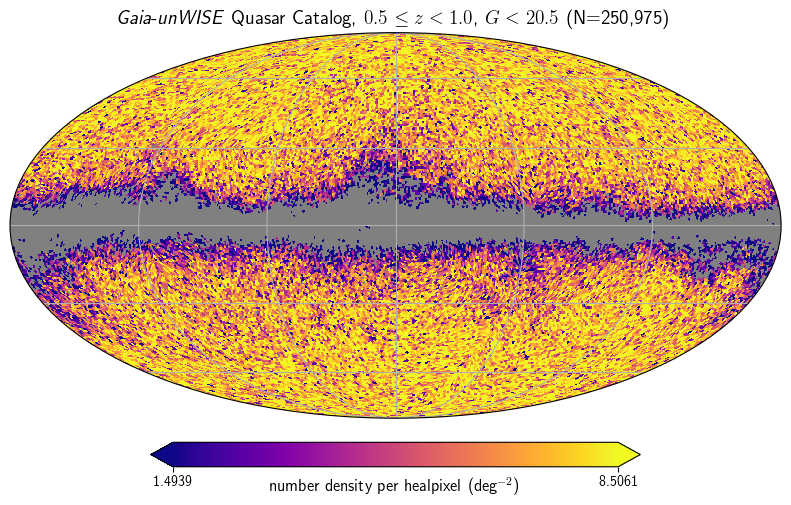

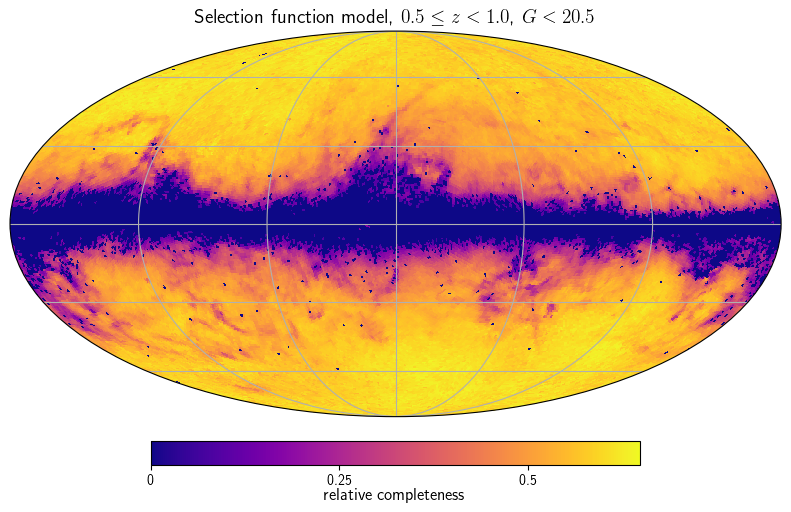

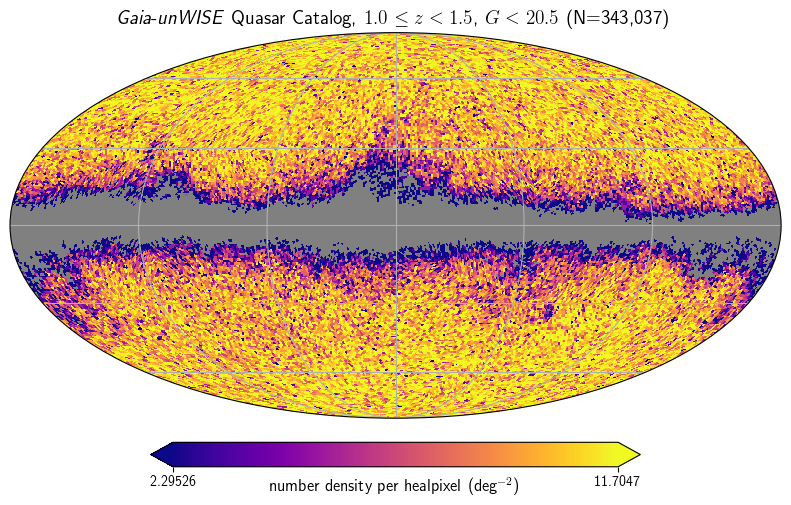

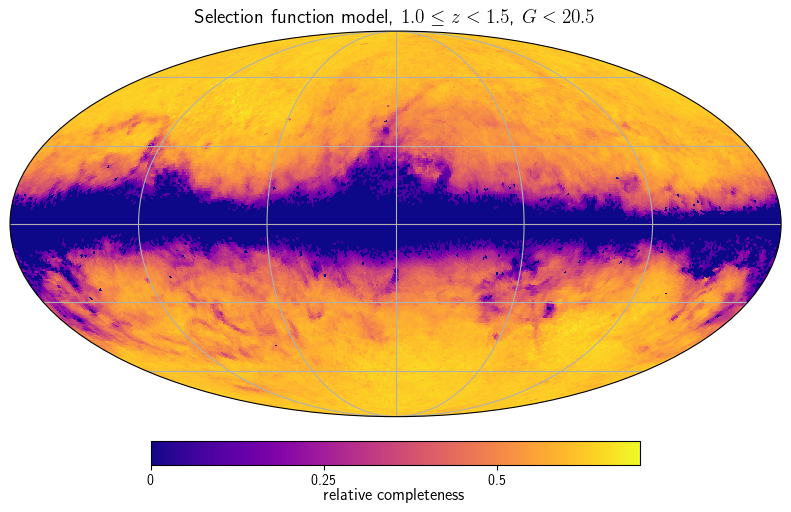

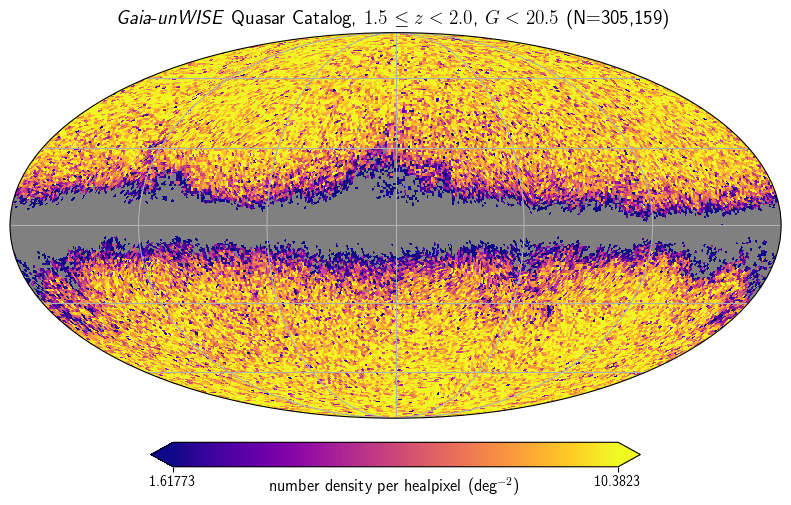

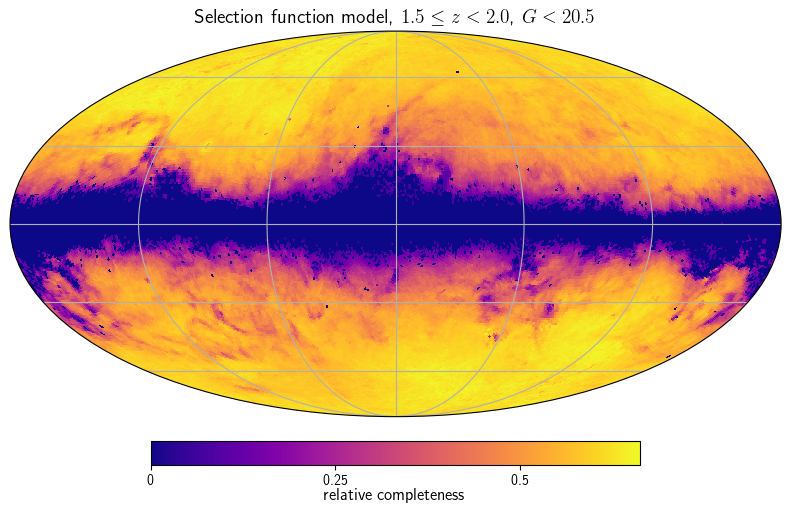

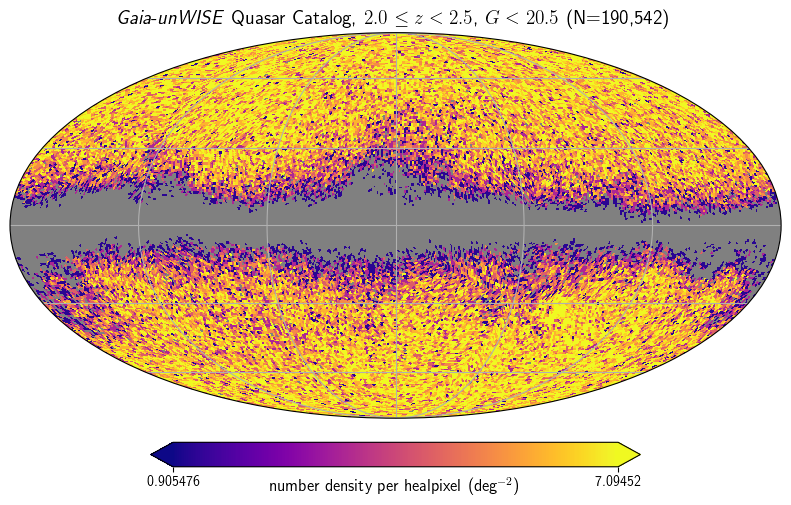

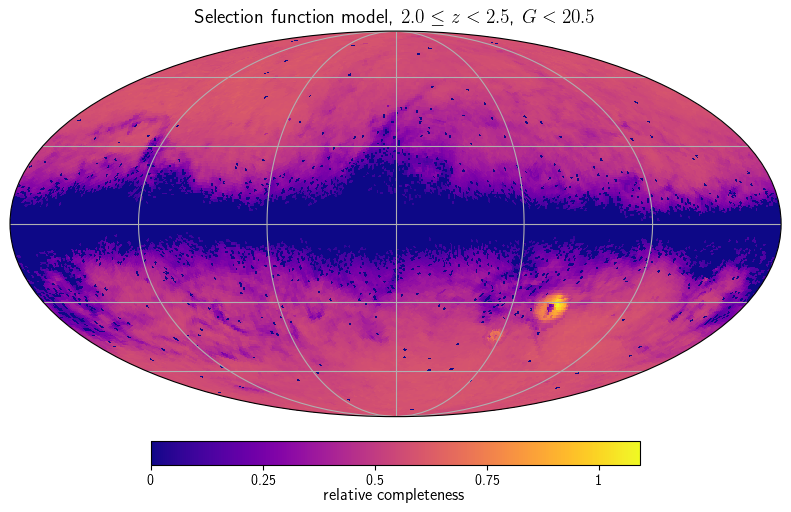

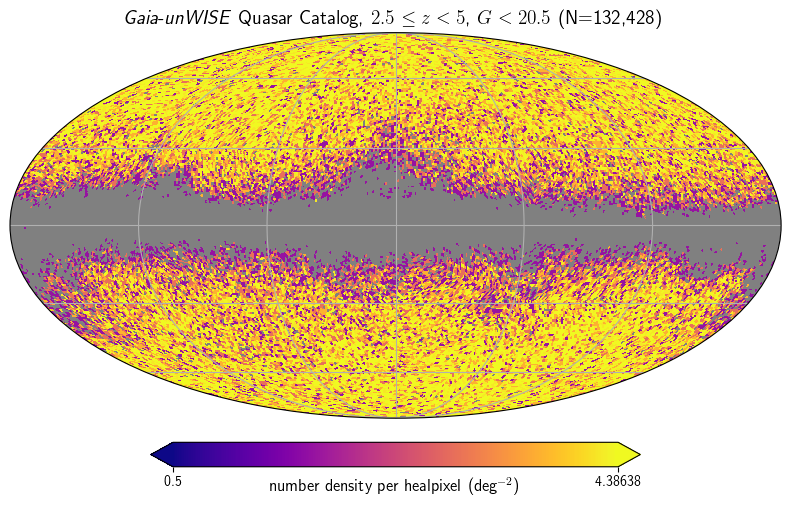

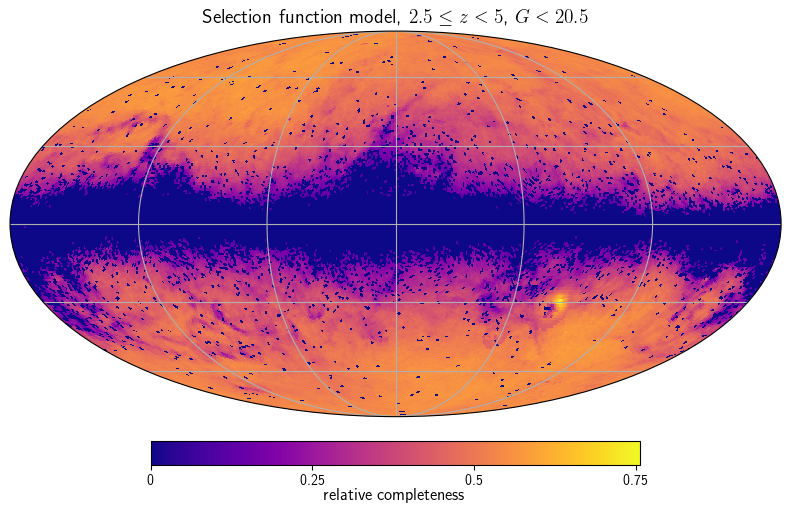

In [32]:
G_lim = G_hi
z_bins = z_bins_6
N = len(z_bins)-1

for n in range(N):
    print(n)
    tag_cat = f'_zsplit{N}bin{n}CIB'
    z_str = f'${z_bins[n]} \leq z < {z_bins[n+1]}$'
    fn_gcat = f'../data/quaia_G{G_lim}{tag_cat}.fits'

    tab_gcat = Table.read(fn_gcat)
    N_gcat = len(tab_gcat)
    #print(f"Number of data sources: {N_gcat}")
    
    # Make map
    pixel_indices_gcat = hp.ang2pix(NSIDE, tab_gcat['ra'], tab_gcat['dec'], lonlat=True)
    map_gcat = np.bincount(pixel_indices_gcat, minlength=NPIX)
    #print(np.min(map_gcat), np.max(map_gcat), np.median(map_gcat), np.std(map_gcat))
    #print(np.median(map_gcat)-np.std(map_gcat), np.median(map_gcat)+np.std(map_gcat))
    
    title_gcat = rf"{name_catalog}, {z_str}, $G<{G_lim}$ (N={len(tab_gcat):,})"
    projview(map_gcat, title=title_gcat,
                unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
                min=max(0.5, np.median(map_gcat)-np.std(map_gcat)), max=np.median(map_gcat)+np.std(map_gcat), 
                norm='log', graticule=True,
                #cbar_ticks=[5, 10]
                ) 
    
    # Selection function
    fn_sel = f"../data/maps/selection_function_NSIDE64_G{G_lim}{tag_cat}.fits"
    map_sel = hp.read_map(fn_sel)
    
    projview(map_sel, title=rf"Selection function model, {z_str}, $G<{G_lim}$",
            unit=r"relative completeness", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            min=0, max=np.max(map_sel),
            cbar_ticks=np.arange(0, max(map_sel), 0.25)
            ) 